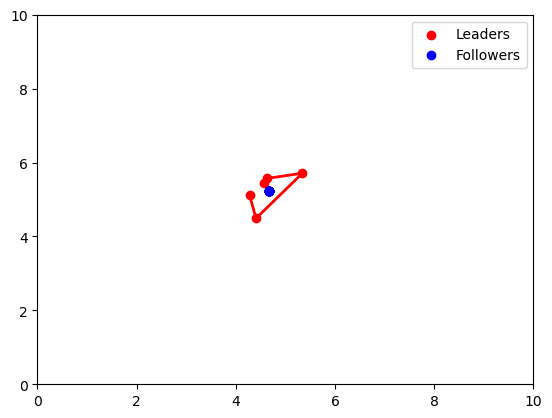

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.spatial import ConvexHull

# Define the number of leaders and followers
num_leaders = 5
num_followers = 15 
num_agents = num_leaders + num_followers

# Define the maximum movement distance per iteration for followers
max_movement_followers = 0.1

# Define the number of iterations
num_iterations = 100

# Define the communication range for the communication protocol
communication_range = 1.5

# Initialize leader positions randomly in the range [0, 10)
leader_positions = 10 * np.random.rand(num_leaders, 2)
leader_positions=np.array([[4, 4],
                            [4, 4],
                            [4, 4],
                            [4, 4],
                            [4, 4]]) + 2 * np.random.rand(num_leaders, 2)

# Initialize follower positions randomly in the range [0, 10)
follower_positions = 10 * np.random.rand(num_followers, 2)

# Function to calculate the convex hull using scipy's ConvexHull
def convex_hull(points):
    hull = ConvexHull(points)
    return hull

# Function to calculate the centroid of a set of points using numpy
def centroid(points):
    x, y = points[:, 0], points[:, 1]
    cx, cy = np.mean(x), np.mean(y)
    return np.array([cx, cy])

# Function to calculate the distance between two agents
def distance_between_agents(agent1, agent2):
    return np.linalg.norm(agent1 - agent2)

# Function to update the follower positions based on the convex hull
def update_follower_positions():
    global follower_positions
    for i in range(num_followers):
        # Combine leader positions and follower positions to find the convex hull
        all_positions = np.vstack((leader_positions, follower_positions))
        hull = convex_hull(all_positions)
        hull_points = all_positions[hull.vertices]

        # Calculate the centroid of the convex hull
        hull_centroid = centroid(hull_points)

        # Calculate the direction vector towards the centroid
        direction = hull_centroid - follower_positions[i]

        # Normalize the direction vector and calculate the new position
        distance = np.linalg.norm(direction)
        if distance > 0:
            direction /= distance
        movement = min(max_movement_followers, distance)
        follower_positions[i] += movement * direction

# Function to exchange positions with neighboring agents for followers
def exchange_follower_positions():
    global follower_positions
    for i in range(num_followers):
        neighbors = []
        for j in range(num_followers):
            if i != j and distance_between_agents(follower_positions[i], follower_positions[j]) < communication_range:
                neighbors.append(follower_positions[j])
        # Update the follower's position with the average position of its neighbors
        if neighbors:
            follower_positions[i] = np.mean(neighbors, axis=0)

# Visualization setup
fig, ax = plt.subplots()
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
leader_scatter = ax.scatter(leader_positions[:, 0], leader_positions[:, 1], c='r', marker='o', label='Leaders')
follower_scatter = ax.scatter(follower_positions[:, 0], follower_positions[:, 1], c='b', marker='o', label='Followers')
hull_line, = ax.plot([], [], c='r', linewidth=2)

ax.legend(loc='upper right')

# Function to update the plot in each animation frame
def update(frame):
    update_follower_positions()
    exchange_follower_positions()  # Execute communication protocol before updating plot

    leader_scatter.set_offsets(leader_positions)
    follower_scatter.set_offsets(follower_positions)

    # Calculate and plot the convex hull
    all_positions = np.vstack((leader_positions, follower_positions))
    hull = convex_hull(all_positions)
    hull_line.set_xdata(all_positions[hull.vertices, 0])
    hull_line.set_ydata(all_positions[hull.vertices, 1])

    return leader_scatter, follower_scatter, hull_line

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=num_iterations, interval=200)

# Save the animation as a gif
ani.save('multi_agent_swarm.gif', writer='pillow')

# Show the animation (optional, you can comment this line out if you don't want to display the animation)
plt.show()


In [16]:
leader_positions=np.array([[4, 6],
                            [4, 6],
                            [4, 6],
                            [4, 6],
                            [4, 6]]) #+ 2 * np.random.rand(num_leaders, 2)
leader_positions
a=0.1
b=0.2
# 初始化
t=0.1
temp=np.ones([num_leaders, 2])
temp[:,0]=a*t*np.ones([num_leaders])
temp[:,1]=b*t*np.ones([num_leaders])
leader_positions_t = temp + leader_positions
np.max(leader_positions_t[:,0])

4.01

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.spatial import ConvexHull
# %matplotlib notebook
# Define the number of leaders and followers
num_leaders = 3
num_followers = 17
num_agents = num_leaders + num_followers

# Define the maximum movement distance per iteration for followers
max_movement_followers = 0.1

# Define the number of iterations
num_iterations = 100

# Initialize leader positions randomly in the range [0, 10)
leader_positions = 10 * np.random.rand(num_leaders, 2)

# Initialize follower positions randomly in the range [0, 10)
follower_positions = 10 * np.random.rand(num_followers, 2)

# Define the communication topology for followers
follower_topology = {0: [1, 2, 3, 4], 1: [0, 2, 5, 6], 2: [0, 1, 3, 7], 3: [0, 2, 4, 8], 4: [0, 3, 9],
                     5: [1, 6, 10], 6: [1, 5, 7, 11], 7: [2, 6, 12], 8: [3, 9, 13], 9: [4, 8, 14],
                     10: [5, 11, 15], 11: [6, 10, 12, 16], 12: [7, 11, 17], 13: [8, 14, 17],
                     14: [9, 13, 18], 15: [10, 16, 18], 16: [11, 15, 17, 19], 17: [12, 13, 16, 19],
                     18: [14, 15], 19: [16, 17]}

# Function to calculate the convex hull using scipy's ConvexHull
def convex_hull(points):
    hull = ConvexHull(points)
    return hull

# Function to calculate the centroid of a set of points using numpy
def centroid(points):
    x, y = points[:, 0], points[:, 1]
    cx, cy = np.mean(x), np.mean(y)
    return np.array([cx, cy])

# Function to calculate the distance between two agents
def distance_between_agents(agent1, agent2):
    return np.linalg.norm(agent1 - agent2)

# Function to update the follower positions based on the convex hull
def update_follower_positions():
    global follower_positions
    for follower_id in range(num_followers):
        neighbor_indices = [x - 1 for x in follower_topology[follower_id]]  # Convert indices to 0-based
        neighbors = [follower_positions[i] for i in neighbor_indices]

        # Combine leader positions and neighbor positions to find the convex hull
        all_positions = np.vstack((leader_positions, np.array(neighbors)))
        hull = convex_hull(all_positions)
        hull_points = all_positions[hull.vertices]

        # Calculate the centroid of the convex hull
        hull_centroid = centroid(hull_points)

        # Calculate the direction vector towards the centroid
        direction = hull_centroid - follower_positions[follower_id]

        # Normalize the direction vector and calculate the new position
        distance = np.linalg.norm(direction)
        if distance > 0:
            direction /= distance
        movement = min(max_movement_followers, distance)
        follower_positions[follower_id] += movement * direction

# Visualization setup
fig, ax = plt.subplots()
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
leader_scatter = ax.scatter(leader_positions[:, 0], leader_positions[:, 1], c='r', marker='o', label='Leaders')
follower_scatter = ax.scatter(follower_positions[:, 0], follower_positions[:, 1], c='b', marker='o', label='Followers')
hull_line, = ax.plot([], [], c='r', linewidth=2)

ax.legend(loc='upper right')

# Function to update the plot in each animation frame
def update(frame):
    update_follower_positions()

    leader_scatter.set_offsets(leader_positions)
    follower_scatter.set_offsets(follower_positions)

    # Calculate and plot the convex hull
    all_positions = np.vstack((leader_positions, follower_positions))
    hull = convex_hull(all_positions)
    hull_line.set_xdata(all_positions[hull.vertices, 0])
    hull_line.set_ydata(all_positions[hull.vertices, 1])

    return leader_scatter, follower_scatter, hull_line

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=num_iterations, interval=200)

# Save the animation as a gif
ani.save('multi_agent_swarm.gif', writer='pillow')

# Show the animation (optional, you can comment this line out if you don't want to display the animation)
plt.show()


UsageError: Line magic function `%` not found.


In [ ]:
follower_topology = {0: [1, 2, 3], 1: [0, 2, 4], 2: [0, 1, 3, 4, 5], 3: [0, 2, 5], 4: [1, 2, 5], 5: [2, 3, 4]}


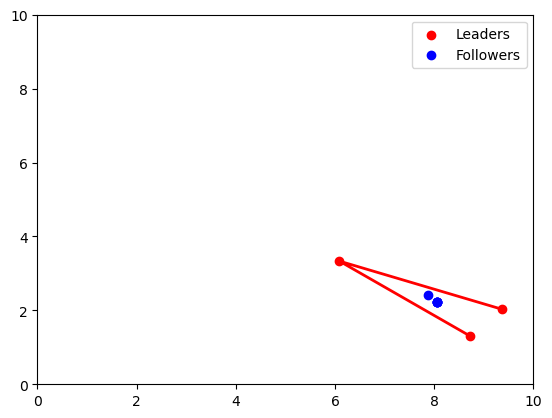

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.spatial import ConvexHull

# Define the number of leaders and followers
num_leaders = 3
num_followers = 6
num_agents = num_leaders + num_followers

# Define the maximum movement distance per iteration for followers
max_movement_followers = 0.1

# Define the number of iterations
num_iterations = 100

# Initialize leader positions randomly in the range [0, 10)
leader_positions = 10 * np.random.rand(num_leaders, 2)

# Initialize follower positions randomly in the range [0, 10)
follower_positions = 10 * np.random.rand(num_followers, 2)

# Define the communication topology for followers
follower_topology = {0: [1, 2, 3], 1: [0, 2, 4], 2: [0, 1, 3, 4, 5], 3: [0, 2, 5], 4: [1, 2, 5], 5: [2, 3, 4]}

# Function to calculate the convex hull using scipy's ConvexHull
def convex_hull(points):
    hull = ConvexHull(points)
    return hull

# Function to calculate the centroid of a set of points using numpy
def centroid(points):
    x, y = points[:, 0], points[:, 1]
    cx, cy = np.mean(x), np.mean(y)
    return np.array([cx, cy])

# Function to calculate the distance between two agents
def distance_between_agents(agent1, agent2):
    return np.linalg.norm(agent1 - agent2)

# Function to update the follower positions based on the convex hull
def update_follower_positions():
    global follower_positions
    for follower_id in range(num_followers):
        neighbor_indices = [x - 1 for x in follower_topology[follower_id]]  # Convert indices to 0-based
        neighbors = [follower_positions[i] for i in neighbor_indices]

        # Combine leader positions and neighbor positions to find the convex hull
        all_positions = np.vstack((leader_positions, np.array(neighbors)))
        hull = convex_hull(all_positions)
        hull_points = all_positions[hull.vertices]

        # Calculate the centroid of the convex hull
        hull_centroid = centroid(hull_points)

        # Calculate the direction vector towards the centroid
        direction = hull_centroid - follower_positions[follower_id]

        # Normalize the direction vector and calculate the new position
        distance = np.linalg.norm(direction)
        if distance > 0:
            direction /= distance
        movement = min(max_movement_followers, distance)
        follower_positions[follower_id] += movement * direction

# Visualization setup
fig, ax = plt.subplots()
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
leader_scatter = ax.scatter(leader_positions[:, 0], leader_positions[:, 1], c='r', marker='o', label='Leaders')
follower_scatter = ax.scatter(follower_positions[:, 0], follower_positions[:, 1], c='b', marker='o', label='Followers')
hull_line, = ax.plot([], [], c='r', linewidth=2)

ax.legend(loc='upper right')

# Function to update the plot in each animation frame
def update(frame):
    update_follower_positions()

    leader_scatter.set_offsets(leader_positions)
    follower_scatter.set_offsets(follower_positions)

    # Calculate and plot the convex hull
    all_positions = np.vstack((leader_positions, follower_positions))
    hull = convex_hull(all_positions)
    hull_line.set_xdata(all_positions[hull.vertices, 0])
    hull_line.set_ydata(all_positions[hull.vertices, 1])

    return leader_scatter, follower_scatter, hull_line

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=num_iterations, interval=200)

# Save the animation as a gif
ani.save('multi_agent_swarm.gif', writer='pillow')

# Show the animation (optional, you can comment this line out if you don't want to display the animation)
plt.show()


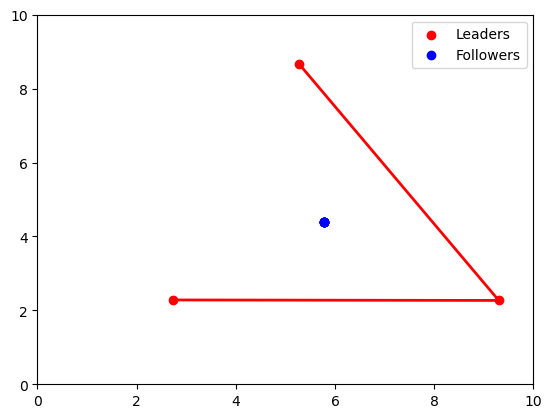

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.spatial import ConvexHull

# Define the number of leaders and followers
num_leaders = 3
num_followers = 6
num_agents = num_leaders + num_followers

# Define the maximum movement distance per iteration for followers
max_movement_followers = 0.1

# Define the number of iterations
num_iterations = 100

# Initialize leader positions randomly in the range [0, 10)
leader_positions = 10 * np.random.rand(num_leaders, 2)

# Initialize follower positions randomly in the range [0, 10)
follower_positions = 10 * np.random.rand(num_followers, 2)

# Define the communication topology for followers
follower_topology = {0: [1, 2, 3], 1: [0, 2, 4], 2: [0, 1, 3, 4, 5], 3: [0, 2, 5], 4: [1, 2, 5], 5: [2, 3, 4]}

# Define the communication topology for leaders
leader_topology = {0: [1, 2], 1: [0, 2], 2: [0, 1]}

# Function to calculate the convex hull using scipy's ConvexHull
def convex_hull(points):
    hull = ConvexHull(points)
    return hull

# Function to calculate the centroid of a set of points using numpy
def centroid(points):
    x, y = points[:, 0], points[:, 1]
    cx, cy = np.mean(x), np.mean(y)
    return np.array([cx, cy])

# Function to calculate the distance between two agents
def distance_between_agents(agent1, agent2):
    return np.linalg.norm(agent1 - agent2)

# Function to update the follower positions based on the convex hull
def update_follower_positions():
    global follower_positions
    for follower_id in range(num_followers):
        neighbor_indices = [x - 1 for x in follower_topology[follower_id]]  # Convert indices to 0-based
        neighbors = [follower_positions[i] for i in neighbor_indices]

        # Combine leader positions and neighbor positions to find the convex hull
        all_positions = np.vstack((leader_positions, np.array(neighbors)))
        hull = convex_hull(all_positions)
        hull_points = all_positions[hull.vertices]

        # Calculate the centroid of the convex hull
        hull_centroid = centroid(hull_points)

        # Calculate the direction vector towards the centroid
        direction = hull_centroid - follower_positions[follower_id]

        # Normalize the direction vector and calculate the new position
        distance = np.linalg.norm(direction)
        if distance > 0:
            direction /= distance
        movement = min(max_movement_followers, distance)
        follower_positions[follower_id] += movement * direction

# Visualization setup
fig, ax = plt.subplots()
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
leader_scatter = ax.scatter(leader_positions[:, 0], leader_positions[:, 1], c='r', marker='o', label='Leaders')
follower_scatter = ax.scatter(follower_positions[:, 0], follower_positions[:, 1], c='b', marker='o', label='Followers')
hull_line, = ax.plot([], [], c='r', linewidth=2)

ax.legend(loc='upper right')

# Function to update the plot in each animation frame
def update(frame):
    update_follower_positions()

    leader_scatter.set_offsets(leader_positions)
    follower_scatter.set_offsets(follower_positions)

    # Calculate and plot the convex hull
    all_positions = np.vstack((leader_positions, follower_positions))
    hull = convex_hull(all_positions)
    hull_line.set_xdata(all_positions[hull.vertices, 0])
    hull_line.set_ydata(all_positions[hull.vertices, 1])

    return leader_scatter, follower_scatter, hull_line

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=num_iterations, interval=200)

# Save the animation as a gif
ani.save('multi_agent_swarm.gif', writer='pillow')

# Show the animation (optional, you can comment this line out if you don't want to display the animation)
plt.show()


<IPython.core.display.Javascript object>


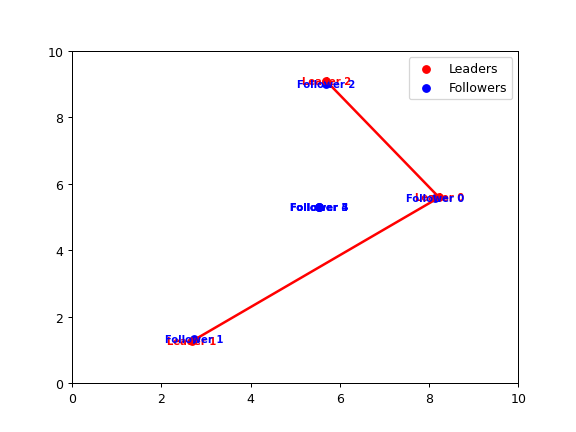

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.spatial import ConvexHull

%matplotlib notebook
# Define the number of leaders and followers
num_leaders = 3
num_followers = 6
num_agents = num_leaders + num_followers

# Define the maximum movement distance per iteration for followers
max_movement_followers = 0.1

# Define the number of iterations
num_iterations = 100

# Initialize leader positions randomly in the range [0, 10)
leader_positions = 10 * np.random.rand(num_leaders, 2)

# Initialize follower positions randomly in the range [0, 10)
follower_positions = 10 * np.random.rand(num_followers, 2)

# Define the communication topology for followers
follower_topology = {0: [1, 2, 3], 1: [0, 2, 4], 2: [0, 1, 3, 4, 5], 3: [0, 2, 5], 4: [1, 2, 5], 5: [2, 3, 4]}

# Define the communication topology for leaders
leader_topology = {0: [0], 1: [1], 2: [2]}

# Function to calculate the convex hull using scipy's ConvexHull
def convex_hull(points):
    hull = ConvexHull(points)
    return hull

# Function to calculate the centroid of a set of points using numpy
def centroid(points):
    x, y = points[:, 0], points[:, 1]
    cx, cy = np.mean(x), np.mean(y)
    return np.array([cx, cy])

# Function to calculate the distance between two agents
def distance_between_agents(agent1, agent2):
    return np.linalg.norm(agent1 - agent2)

# Function for leaders to communicate their positions to the respective followers
def leader_communication():
    for leader_id in range(num_leaders):
        leader_position = leader_positions[leader_id]
        follower_ids = leader_topology[leader_id]
        for follower_id in follower_ids:
            follower_positions[follower_id] = leader_position

# Function to update the follower positions based on the convex hull
def update_follower_positions():
    global follower_positions
    for follower_id in range(num_followers):
        neighbor_indices = [x - 1 for x in follower_topology[follower_id]]  # Convert indices to 0-based
        neighbors = [follower_positions[i] for i in neighbor_indices]

        # Combine leader positions and neighbor positions to find the convex hull
        all_positions = np.vstack((leader_positions, np.array(neighbors)))
        hull = convex_hull(all_positions)
        hull_points = all_positions[hull.vertices]

        # Calculate the centroid of the convex hull
        hull_centroid = centroid(hull_points)

        # Calculate the direction vector towards the centroid
        direction = hull_centroid - follower_positions[follower_id]

        # Normalize the direction vector and calculate the new position
        distance = np.linalg.norm(direction)
        if distance > 0:
            direction /= distance
        movement = min(max_movement_followers, distance)
        follower_positions[follower_id] += movement * direction

# # Visualization setup
# fig, ax = plt.subplots()
# ax.set_xlim(0, 10)
# ax.set_ylim(0, 10)
# leader_scatter = ax.scatter(leader_positions[:, 0], leader_positions[:, 1], c='r', marker='o', label='Leaders')
# follower_scatter = ax.scatter(follower_positions[:, 0], follower_positions[:, 1], c='b', marker='o', label='Followers')
# hull_line, = ax.plot([], [], c='r', linewidth=2)

# ax.legend(loc='upper right')

# # Function to update the plot in each animation frame
# def update(frame):
#     leader_communication()  # Leaders communicate their positions to followers
#     update_follower_positions()

#     leader_scatter.set_offsets(leader_positions)
#     follower_scatter.set_offsets(follower_positions)

#     # Calculate and plot the convex hull
#     all_positions = np.vstack((leader_positions, follower_positions))
#     hull = convex_hull(all_positions)
#     hull_line.set_xdata(all_positions[hull.vertices, 0])
#     hull_line.set_ydata(all_positions[hull.vertices, 1])

#     return leader_scatter, follower_scatter, hull_line

# # Create the animation
# animation.FuncAnimation(fig, update, frames=num_iterations, interval=200,repeat=False)


# Visualization setup
fig, ax = plt.subplots()
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
leader_scatter = ax.scatter(leader_positions[:, 0], leader_positions[:, 1], c='r', marker='o', label='Leaders')
follower_scatter = ax.scatter(follower_positions[:, 0], follower_positions[:, 1], c='b', marker='o', label='Followers')
hull_line, = ax.plot([], [], c='r', linewidth=2)

leader_labels = []
follower_labels = []
for i in range(num_leaders):
    leader_labels.append(ax.text(leader_positions[i, 0], leader_positions[i, 1], f"Leader {i}", ha='center', va='center', color='r', fontsize=8, fontweight='bold'))
for i in range(num_followers):
    follower_labels.append(ax.text(follower_positions[i, 0], follower_positions[i, 1], f"Follower {i}", ha='center', va='center', color='b', fontsize=8, fontweight='bold'))

ax.legend(loc='upper right')

# Function to update the plot in each animation frame
def update(frame):
    leader_communication()  # Leaders communicate their positions to followers
    update_follower_positions()

    leader_scatter.set_offsets(leader_positions)
    follower_scatter.set_offsets(follower_positions)

    # Calculate the convex hull for leaders only
    hull = convex_hull(leader_positions)
    hull_line.set_xdata(leader_positions[hull.vertices, 0])
    hull_line.set_ydata(leader_positions[hull.vertices, 1])

    # Update labels
    for i in range(num_leaders):
        leader_labels[i].set_position(leader_positions[i])
    for i in range(num_followers):
        follower_labels[i].set_position(follower_positions[i])

    return leader_scatter, follower_scatter, hull_line, *leader_labels, *follower_labels

# Create the animation
animation.FuncAnimation(fig, update, frames=num_iterations, interval=200, blit=True)


In [20]:
import numpy as np

# Define the number of followers
num_followers = 6

# Define the communication topology for followers
follower_topology = {0: [1, 3], 1: [0, 2], 2: [1], 3: [0, 4], 4: [3, 5], 5: [4]}

# Create the communication topology matrix
communication_topology = np.zeros((num_followers, num_followers))
for i in range(num_followers):
    neighbors = follower_topology[i]
    for neighbor in neighbors:
        communication_topology[i, neighbor] = 1

# Compute the Laplacian matrix
degree_matrix = np.diag(np.sum(communication_topology, axis=1))
laplacian_matrix = degree_matrix - communication_topology

print("Communication Topology Matrix:")
print(communication_topology)

print("\nLaplacian Matrix:")
print(laplacian_matrix)


Communication Topology Matrix:
[[0. 1. 0. 1. 0. 0.]
 [1. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 1.]
 [0. 0. 0. 0. 1. 0.]]

Laplacian Matrix:
[[ 2. -1.  0. -1.  0.  0.]
 [-1.  2. -1.  0.  0.  0.]
 [ 0. -1.  1.  0.  0.  0.]
 [-1.  0.  0.  2. -1.  0.]
 [ 0.  0.  0. -1.  2. -1.]
 [ 0.  0.  0.  0. -1.  1.]]


In [1]:
import numpy as np

# 定义网络拓扑的矩阵
communication_topology = np.array([[0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0],
                                    [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
                                    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
                                    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
                                    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
                                    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
                                    [1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
                                    [0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0],
                                    [0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0],
                                    [0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0],
                                    [0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1],
                                    [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0]])

# 计算Laplacian矩阵
degree_matrix = np.diag(np.sum(communication_topology, axis=1))
laplacian_matrix = degree_matrix - communication_topology

# 计算Laplacian矩阵的特征值
eigenvalues = np.linalg.eigvals(laplacian_matrix)

# 找出最大特征值
max_eigenvalue = np.max(eigenvalues)
print("Laplacian矩阵的最大特征值为:", max_eigenvalue)


Laplacian矩阵的最大特征值为: (4.395086158913649+0.10890874311209271j)
